In [4]:
import os
import glob

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns

from helper_functions import chessboard_images, extract_corners
from calibration2 import find_homography


In [5]:
pattern_size=(5, 8)
images = chessboard_images('/workspace/test_images')

['/workspace/test/images/Ladybug1.jpg', '/workspace/test/images/Ladybug10.jpg', '/workspace/test/images/Ladybug11.jpg', '/workspace/test/images/Ladybug12.jpg', '/workspace/test/images/Ladybug13.jpg', '/workspace/test/images/Ladybug2.jpg', '/workspace/test/images/Ladybug3.jpg', '/workspace/test/images/Ladybug4.jpg', '/workspace/test/images/Ladybug5.jpg', '/workspace/test/images/Ladybug6.jpg', '/workspace/test/images/Ladybug7.jpg', '/workspace/test/images/Ladybug8.jpg', '/workspace/test/images/Ladybug9.jpg']


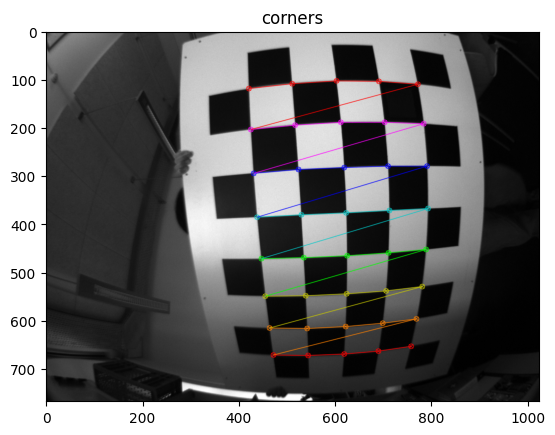

In [6]:
# Test corner extraction
image = cv.imread("/workspace/test/images/Ladybug2.jpg")
corners = extract_corners(image, pattern_size)

if corners is not None:
    cv.drawChessboardCorners(image, pattern_size, corners, True)       
    plt.title('corners')
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show()

In [8]:
distance = []
obj_points = np.mgrid[:pattern_size[0],:pattern_size[1]].T.reshape(-1,2)
for img in images:
    corners = extract_corners(img, pattern_size).astype(int)
    if corners is not None:
        H_opencv, _ = cv.findHomography(obj_points, corners)
        H_mine = find_homography(obj_points, corners)
        for point in obj_points:
            sample_point = np.append(point, 1)

            pixel_homogeneous_point_ground_truth = np.dot(H_opencv, sample_point)
            pixel_homogeneous_point_DLT = np.dot(H_mine, sample_point)

            pixel_point_ground_truth = [int(pixel_homogeneous_point_ground_truth[0] / pixel_homogeneous_point_ground_truth[2]),
            int(pixel_homogeneous_point_ground_truth[1] / pixel_homogeneous_point_ground_truth[2])]
            pixel_point_DLT = [int(pixel_homogeneous_point_DLT[0] / pixel_homogeneous_point_DLT[2]), int(pixel_homogeneous_point_DLT[1] / pixel_homogeneous_point_DLT[2])]
            distance.append(cv.norm(np.array(pixel_point_ground_truth), np.array(pixel_point_DLT), normType=cv.NORM_L1))

/tmp/ipykernel_30100/3966950288.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = distance,


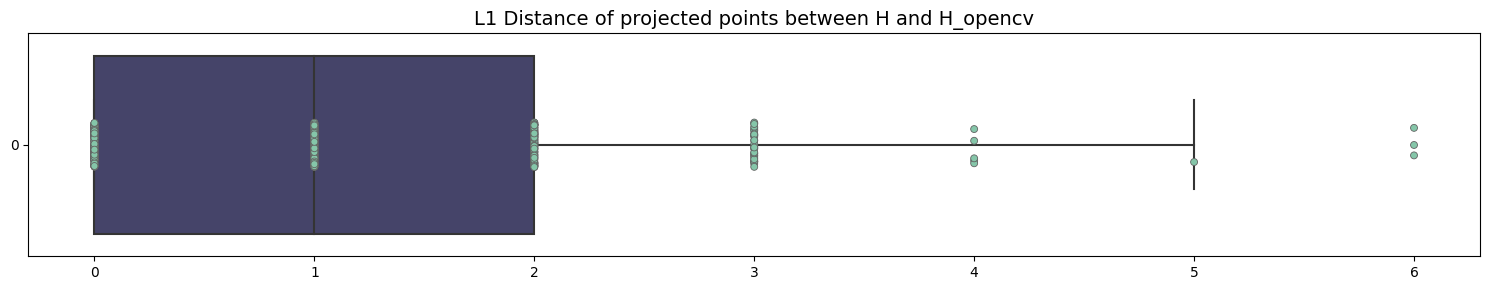

In [9]:

# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(data = distance,
     palette=["#3f3e6fd1"], fliersize = 0, orient = 'h')

sns.stripplot(data = distance,
     linewidth = 0.6, palette=["#85c6a9"], orient = 'h')

# plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('L1 Distance of projected points between H and H_opencv', fontsize= 14)
plt.tight_layout()